In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import joblib
import tensorflow as tf

2021-08-30 15:38:46.647859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-30 15:38:46.647920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
def get_data(name_file):
    active_users_df_10PlusRatings_partial = pd.read_csv(f'../data/Processed_data/{name_file}.csv')
    return active_users_df_10PlusRatings_partial


In [5]:
def get_anime():
    anime_df_relevant_PG = pd.read_csv('../data/Processed_data/anime_df_relevant_PG.csv')
    return anime_df_relevant_PG.rename(columns={'MAL_ID' : 'anime_id'})

In [6]:
def process_data(name_file):
    data_users_df = get_data(name_file)
    data_users_df['rating'] = data_users_df['rating']/10
    
    anime_df_relevant_PG = get_anime()
    anime_name_df = anime_df_relevant_PG[['anime_id','Name']]
    data_users_df_merge = data_users_df.merge(anime_name_df, on = 'anime_id', how='inner')
    pivot_df = data_users_df_merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)
    
    anime_Genres_df = anime_df_relevant_PG[['anime_id','Genres']]
    anime_Genres_df_encoded = pd.concat(objs = [anime_Genres_df.drop(columns = 'Genres', axis =1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], axis = 1)
    anime_Genres_df_encoded = anime_Genres_df_encoded.set_index('anime_id')
    
    pivot_df = pivot_df.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)
    anime_name_pivot_df = data_users_df_merge[['anime_id','Name']].drop_duplicates()
    anime_name_pivot_df = anime_name_pivot_df.sort_values('anime_id')
    anime_name_pivot_df = anime_name_pivot_df.reset_index().drop(columns = 'index')
    
    return pivot_df, anime_name_pivot_df

In [5]:
truc = get_data('active_users_df_10PlusRatings_partial').iloc[0:10**2,:]

In [6]:
truc

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,21,10
4,0,24,9
...,...,...,...
95,1,28851,9
96,1,30831,7
97,1,32937,7
98,1,11771,7


In [7]:
anime_df_relevant_PG = get_anime()[['anime_id']]

In [8]:
anime_df_relevant_PG

,anime_id
0,1
1,5
2,6
3,7
4,8
...,...
11043,47398
11044,47402
11045,47614
11046,47616


In [9]:
merge = anime_df_relevant_PG.merge(truc, on = 'anime_id', how='outer').drop_duplicates(subset=['anime_id']).fillna(0)

In [10]:
merge

,anime_id,user_id,rating
0,1,0.0,0.0
1,5,0.0,0.0
2,6,0.0,0.0
3,7,0.0,0.0
4,8,0.0,0.0
...,...,...,...
11045,47398,0.0,0.0
11046,47402,0.0,0.0
11047,47614,0.0,0.0
11048,47616,0.0,0.0


In [11]:
pivot = merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [12]:
pivot

user_id,0.0,1.0
anime_id,,
1,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
...,...,...
47398,0.0,0.0
47402,0.0,0.0
47614,0.0,0.0


In [13]:
pivot.sum()

user_id
0.0    356.0
1.0    418.0
dtype: float64

In [14]:
truc.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0).sum()

user_id
0    356.0
1    435.0
dtype: float64

In [15]:
anime_df_relevant_PG.shape

(11048, 1)

In [16]:
10**6

1000000

In [17]:
2**32>1*10000*10**6

False

In [ ]:
pivot_df, anime_name_pivot_df = process_data('active_users_df_10PlusRatings_partial')

In [19]:
pivot_df

,0,1,2,3,4,5,6,7,8,11,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.9,0.0,0.0,0.6,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
anime_name_pivot_df

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10177,47398,Kimetsu Gakuen: Valentine-hen
10178,47402,Heikousen
10179,47614,Nu Wushen de Canzhuo Spring Festival Special
10180,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [7]:
def model_knn_anime_map(pca_pivot):
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'auto')
    model_knn.fit(pca_pivot)
    print('here')
    joblib.dump(model_knn, f'knn_.joblib')

In [8]:
class Trainer:
    def __init__(self, pca_pivot):
        self.pca_pivot = pca_pivot
        
    def train(self):
        model_knn_anime_map(self.pca_pivot)
        print('ok')

In [ ]:
model_knn_anime_map(pivot_df)

In [9]:
pivot_df, anime_name_pivot_df = process_data('active_users_df_10PlusRatings_partial')
model = Trainer(pivot_df)
model.train()

here


AttributeError: 'NearestNeighbors' object has no attribute 'outputs'

In [25]:
for col in pivot_df.columns:
    print(col)

0
1
2
3
4
5
6
7
8
11
12
13
14
16
17
18
19
20
21
22
23
25
27
28
29
30
32
33
34
36
37
38
40
41
42
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
70
72
73
74
75
77
78
80
81
82
83
84
85
87
88
89
90
91
93
94
95
97
99
101
102
103
105
107
108
110
111
112
113
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
139
143
145
146
147
148
149
150
152
153
154
155
156
157
158
160
162
163
164
165
166
167
169
171
172
173
174
177
178
179
181
182
184
185
186
187
188
192
193
194
195
196
197
198
201
202
204
205
207
208
209
210
211
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
232
235
237
238
239
240
241
243
244
245
246
247
248
249
251
252
253
254
257
258
259
260
262
263
264
265
266
267
268
269
270
272
273
274
275
276
277
278
281
282
283
284
285
286
287
288
289
290
291
292
293
296
297
298
299
300
301
302
303
304
306
307
308
310
311
313
314
315
316
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
338
339
340

2342
2343
2344
2346
2347
2348
2349
2350
2351
2353
2355
2356
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2375
2376
2377
2378
2379
2381
2382
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2398
2399
2400
2401
2402
2403
2404
2405
2408
2410
2411
2412
2413
2414
2415
2416
2418
2419
2422
2423
2424
2425
2426
2427
2428
2429
2430
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2447
2448
2449
2450
2451
2452
2453
2454
2456
2458
2459
2460
2461
2464
2465
2468
2469
2470
2471
2472
2473
2474
2476
2479
2480
2482
2483
2484
2485
2487
2488
2489
2492
2493
2494
2495
2496
2497
2498
2500
2501
2502
2504
2506
2507
2508
2509
2512
2513
2514
2515
2517
2518
2519
2520
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2542
2543
2544
2545
2546
2547
2548
2551
2552
2553
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2584
2585
2586
2587


4966
4967
4968
4969
4970
4971
4973
4975
4976
4977
4978
4980
4981
4983
4984
4986
4987
4988
4989
4990
4991
4992
4993
4996
4997
4998
Action
Adventure
Cars
Comedy
Dementia
Demons
Drama
Ecchi
Fantasy
Game
Harem
Historical
Horror
Josei
Kids
Magic
Martial Arts
Mecha
Military
Music
Mystery
Parody
Police
Psychological
Romance
Samurai
School
Sci-Fi
Seinen
Shoujo
Shoujo Ai
Shounen
Shounen Ai
Slice of Life
Space
Sports
Super Power
Supernatural
Thriller
Vampire


In [26]:
model_knn_anime_map(pivot_df)

here


In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'auto')

In [ ]:
model_knn.fit(pivot_df)

In [29]:
model_load = joblib.load('../data/knn_10plus.joblib')

In [30]:
model_load_2 = joblib.load('../data/models_anime_map_knn_model.joblib')

In [31]:
print(sklearn.__version__)

0.24.2


In [32]:
def recomendation_10PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_name_pivot_df.index[anime_name_pivot_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_load_2.kneighbors(pivot_df.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([pivot_df.index[indices.flatten()[i]],0])
        else:
            prediction.append([pivot_df.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_pivot_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [33]:
recomendation_10PlusRatings('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.18049078542744768],
 ['Death Note', 0.32724375187989996],
 ['Bleach', 0.35922338431707146],
 ['Shingeki no Kyojin', 0.3764965221555553],
 ['Fullmetal Alchemist: Brotherhood', 0.4092187913883153],
 ['Code Geass: Hangyaku no Lelouch', 0.4141593159792041],
 ['Sword Art Online', 0.4145034622526954],
 ['One Piece', 0.4324693299705893],
 ['Fairy Tail', 0.43374727465720364],
 ['One Punch Man', 0.440672137299862]]

In [36]:
df_id_PG = get_anime()[['anime_id']]

In [37]:
df_id_PG

,anime_id
0,1
1,5
2,6
3,7
4,8
...,...
11043,47398
11044,47402
11045,47614
11046,47616


In [38]:
df_vote = get_data('active_users_df_10PlusRatings_partial')

In [39]:
df_vote = df_vote[['user_id', 'anime_id', 'rating']]

In [40]:
df_vote.shape

(822418, 3)

In [41]:
df_vote_PG = df_vote.merge(df_id_PG, on = 'anime_id', how='inner')

In [42]:
df_vote_PG = df_vote_PG[df_vote_PG.rating !=0]

In [43]:
minimun_of_rating = 100
counts = df_vote_PG['user_id'].value_counts()
active_users_df = df_vote_PG[df_vote_PG['user_id'].isin(counts[counts >= minimun_of_rating].index)]
active_users_df.head()

,user_id,anime_id,rating
1,34,67,10
2,128,67,8
3,148,67,8
4,154,67,10
5,198,67,8


In [44]:
active_users_df.shape

(728387, 3)

In [45]:
name_file = "anime_list"
minimun_of_rating = 10
new_df = f'{name_file}_{minimun_of_rating}plus_PG'

In [46]:
new_df

'anime_list_10plus_PG'

In [47]:
print(active_users_df.shape)

(728387, 3)


In [48]:
rating_complete_100plus_PG = pd.read_csv(f'../data/Processed_data/anime_map_data_rating_complete_100plus_PG.csv',nrows = 500000)

In [49]:
rating_complete_100plus_PG.head(100)

,user_id,anime_id,complete
0,6,430,1
1,19,430,1
2,33,430,1
3,41,430,1
4,46,430,1
...,...,...,...
95,847,430,1
96,853,430,1
97,887,430,1
98,890,430,1


In [50]:
'complete' in rating_complete_100plus_PG.columns

True

In [51]:
df = rating_complete_100plus_PG

In [52]:
df

,user_id,anime_id,complete
0,6,430,1
1,19,430,1
2,33,430,1
3,41,430,1
4,46,430,1
...,...,...,...
499995,140622,164,1
499996,140625,164,1
499997,140629,164,1
499998,140638,164,1


In [53]:
anime_df_relevant_PG = get_anime()

In [54]:
if 'rating' in df.columns:
    pivot_df = df.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)
else:
    pivot_df = df.pivot_table(index='anime_id',columns='user_id',values='complete').fillna(0)

In [55]:
pivot_df

user_id,3,4,6,11,16,17,19,21,33,34,...,353383,353384,353385,353386,353387,353388,353391,353392,353395,353398
anime_id,,,,,,,,,,,,,,,,,,,,,
68,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
164,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
430,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
433,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [56]:
anime_Genres_df = anime_df_relevant_PG[['anime_id','Genres']]
anime_Genres_df_encoded = pd.concat(objs = [anime_Genres_df.drop(columns = 'Genres', axis =1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], axis = 1)
anime_Genres_df_encoded = anime_Genres_df_encoded.set_index('anime_id')

In [57]:
anime_Genres_df_encoded

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47614,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
pivot_df = pivot_df.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)
pivot_df

,3,4,6,11,16,17,19,21,33,34,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
68,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0
121,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
164,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
356,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
430,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
433,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
578,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
anime_name_pivot_df = anime_df_relevant_PG[['anime_id','Name']].drop_duplicates().set_index('anime_id')
anime_name_pivot_df = anime_name_pivot_df.merge(pivot_df[[]], how='inner',left_index=True, right_index=True)
anime_name_pivot_df = anime_name_pivot_df.reset_index().sort_values('anime_id')

In [60]:
anime_name_pivot_df

,anime_id,Name
0,68,Black Cat (TV)
1,121,Fullmetal Alchemist
2,164,Mononoke Hime
3,356,Fate/stay night
4,430,Fullmetal Alchemist: The Conqueror of Shamballa
5,431,Howl no Ugoku Shiro
6,433,"Kumo no Mukou, Yakusoku no Basho"
7,570,Jin-Rou
8,578,Hotaru no Haka
9,600,Legend of Duo


In [61]:
anime_name_pivot_df.shape[0]

19

In [62]:
anime_name_pivot_df.shape[0]

19

In [63]:
anime_df_relevant_PG[['anime_id','Name']]

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen
11044,47402,Heikousen
11045,47614,Nu Wushen de Canzhuo Spring Festival Special
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [64]:
anime_name_pivot_df

,anime_id,Name
0,68,Black Cat (TV)
1,121,Fullmetal Alchemist
2,164,Mononoke Hime
3,356,Fate/stay night
4,430,Fullmetal Alchemist: The Conqueror of Shamballa
5,431,Howl no Ugoku Shiro
6,433,"Kumo no Mukou, Yakusoku no Basho"
7,570,Jin-Rou
8,578,Hotaru no Haka
9,600,Legend of Duo


In [65]:
#PCA

In [66]:
int(pivot_df.shape[0])

19

In [67]:
pca = PCA()
pca.fit(pivot_df)
pca_array = pca.transform(pivot_df)

In [68]:
pca_pivot = pd.DataFrame(pca_array)

In [69]:
pca_pivot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-24.846743,40.474674,5.195347,-11.247827,-30.371116,-33.773603,72.787952,33.438336,36.186449,-59.519430,8.632786,4.281656,19.213469,-10.073594,-0.032181,-0.072057,-0.083896,-0.000583,1.006576e-12
1,143.537809,108.192884,-78.147684,49.972967,4.184044,13.732506,19.309686,-60.931667,1.054873,-3.022335,-1.767450,0.483233,-2.406160,-2.713080,-0.035321,-0.053744,-0.075749,-0.000521,4.898656e-12
2,-5.127827,-28.292689,-22.357300,-33.593782,-17.736378,122.469880,13.371317,18.137133,25.359989,4.373327,3.998572,3.512948,2.978471,3.831237,0.109891,0.151778,0.127700,-0.003772,-2.292808e-13
3,102.718618,101.037147,115.714305,-84.794889,21.061466,4.627058,-23.671506,0.815068,-7.133453,2.191657,1.267030,2.151534,-0.356976,-4.298171,0.035263,-0.066301,-0.028998,0.000660,1.653729e-12
4,45.117305,60.209805,-56.973047,44.504067,13.439536,-7.499565,-46.536706,90.796280,-11.640078,8.933171,1.722236,-1.019669,-1.776442,-0.921384,-0.182667,-0.119232,0.005958,-0.000540,1.597334e-12
5,129.732965,-90.011370,-67.735777,-84.638591,-57.869426,-35.659976,-20.573900,-3.776577,-10.492577,-3.821099,0.809248,-12.577567,-7.160445,-3.292962,-0.058178,-0.184740,-0.129772,0.003815,2.137680e-12
6,-10.213792,-27.366780,20.855479,26.829884,10.340510,-15.290843,-48.673490,-14.009637,85.791462,-6.445421,-35.847121,-10.384573,-22.635068,-5.425658,-0.064078,0.105576,0.047331,-0.000606,-4.157716e-13
7,-41.115770,-9.937842,-0.914374,4.266454,15.733963,0.039438,-20.735677,-14.133931,-9.650119,-5.002057,-16.605428,-48.059618,75.326642,17.558182,-0.046687,0.269267,0.148815,-0.006155,-6.850881e-13
8,50.629932,-77.973526,-18.817346,-18.833496,118.909184,-9.765226,44.797283,8.028402,-3.052368,1.560364,1.772853,-3.886690,-11.613627,-0.002030,0.157261,-0.027429,-0.066258,0.002909,3.815252e-13
9,-72.426939,2.951575,0.553983,2.941890,-4.361840,0.528596,-2.436852,-7.749461,-18.950702,-1.388773,-0.890998,-5.422032,-11.679296,-17.139433,32.392944,7.916736,3.558029,-0.133832,-1.241991e-12


In [70]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [71]:
prct = 0
cnt = 0
for i in pca.explained_variance_ratio_:
    cnt += 1
    prct += i
    if prct>0.80:
        print(f'{cnt}, {prct}')
        break

8, 0.8157335526051361


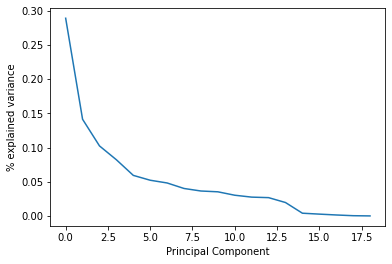

In [72]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

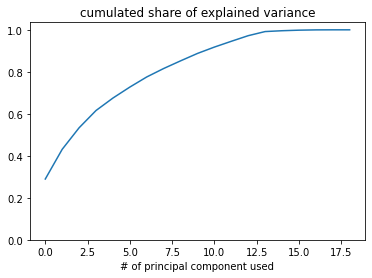

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [74]:
%%time
pca = PCA(n_components = 0.9)
pca.fit(pivot_df)
pca_array = pca.transform(pivot_df)

CPU times: user 7.91 s, sys: 3.94 s, total: 11.9 s
Wall time: 3.89 s


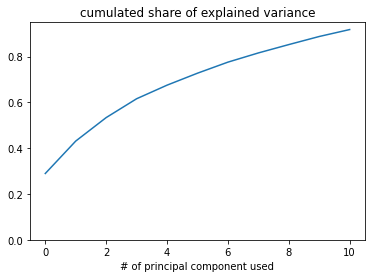

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [76]:
%%time
pca = PCA(n_components = 0.9, svd_solver='full')
pca.fit(pivot_df)
pca_array = pca.transform(pivot_df)

CPU times: user 7.16 s, sys: 5.4 s, total: 12.6 s
Wall time: 4.15 s


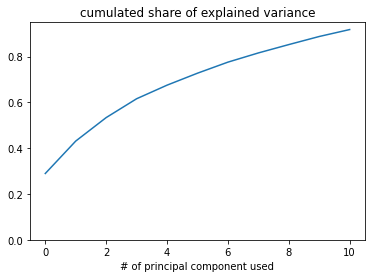

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [78]:
%%time
pca = PCA(n_components = 'mle', svd_solver='full')
pca.fit(pivot_df)
pca_array = pca.transform(pivot_df)

ValueError: n_components='mle' is only supported if n_samples >= n_features

In [79]:
def PCA_vector(pivot_df):
    pca = PCA(n_components = 0.9, svd_solver='full')
    pca.fit(pivot_df)
    print(pca.explained_variance_ratio_.sum())
    pca_array = pca.transform(pivot_df)
    return pd.DataFrame(pca_array)

In [80]:
PCA_vector(pivot_df)

0.9178068334489748


,0,1,2,3,4,5,6,7,8,9,10
0,-24.846743,40.474674,5.195347,-11.247827,-30.371116,-33.773603,72.787952,33.438336,36.186449,-59.519430,8.632786
1,143.537809,108.192884,-78.147684,49.972967,4.184044,13.732506,19.309686,-60.931667,1.054873,-3.022335,-1.767450
2,-5.127827,-28.292689,-22.357300,-33.593782,-17.736378,122.469880,13.371317,18.137133,25.359989,4.373327,3.998572
3,102.718618,101.037147,115.714305,-84.794889,21.061466,4.627058,-23.671506,0.815068,-7.133453,2.191657,1.267030
4,45.117305,60.209805,-56.973047,44.504067,13.439536,-7.499565,-46.536706,90.796280,-11.640078,8.933171,1.722236
5,129.732965,-90.011370,-67.735777,-84.638591,-57.869426,-35.659976,-20.573900,-3.776577,-10.492577,-3.821099,0.809248
6,-10.213792,-27.366780,20.855479,26.829884,10.340510,-15.290843,-48.673490,-14.009637,85.791462,-6.445421,-35.847121
7,-41.115770,-9.937842,-0.914374,4.266454,15.733963,0.039438,-20.735677,-14.133931,-9.650119,-5.002057,-16.605428
8,50.629932,-77.973526,-18.817346,-18.833496,118.909184,-9.765226,44.797283,8.028402,-3.052368,1.560364,1.772853
9,-72.426939,2.951575,0.553983,2.941890,-4.361840,0.528596,-2.436852,-7.749461,-18.950702,-1.388773,-0.890998


In [81]:
data = get_data('active_users_df_10PlusRatings_partial')

In [82]:
truc = data.iloc[0:10**2,:]

In [83]:
truc_2 = data.iloc[10**2:2*10**2,:]

In [84]:
truc.shape == truc_2.shape

True

In [85]:
pivot = truc.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [86]:
pivot_2 = truc_2.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [87]:
merge = pivot.merge(pivot_2, how='left',left_index=True, right_index=True)

In [88]:
conc = pd.concat([pivot, pivot_2], axis=0).fillna(0)

In [89]:
conc.sum()

user_id
0    356.0
1    942.0
2    309.0
dtype: float64

In [90]:
pivot.sum()

user_id
0    356.0
1    435.0
dtype: float64

In [91]:
pivot_2.sum() + pivot.sum()

user_id
0      NaN
1    942.0
2      NaN
dtype: float64

In [92]:
pivot_2.sum()

user_id
1    507.0
2    309.0
dtype: float64

In [93]:
pivot

user_id,0,1
anime_id,,
21,10.0,9.0
24,9.0,0.0
67,9.0,0.0
68,6.0,0.0
121,9.0,0.0
...,...,...
40748,0.0,9.0
40776,0.0,9.0
40852,0.0,9.0


In [94]:
pivot_2

user_id,1,2
anime_id,,
15,0.0,9.0
19,9.0,0.0
20,10.0,0.0
21,0.0,9.0
22,9.0,9.0
...,...,...
39547,9.0,0.0
39587,9.0,0.0
39940,7.0,0.0


In [95]:
conc

user_id,0,1,2
anime_id,,,
21,10.0,9.0,0.0
24,9.0,0.0,0.0
67,9.0,0.0,0.0
68,6.0,0.0,0.0
121,9.0,0.0,0.0
...,...,...,...
39547,0.0,9.0,0.0
39587,0.0,9.0,0.0
39940,0.0,7.0,0.0


In [96]:
data.shape[0]

822418

In [97]:
data.shape[0]//(10**5)

8

In [98]:
for i in range(data.shape[0]//(10**5)+1):
    print(i*10**5)
    if i == data.shape[0]//(10**5):
        print(data.shape[0])

0
100000
200000
300000
400000
500000
600000
700000
800000
822418


In [99]:
concat = pd.DataFrame()
for i in range(data.shape[0]//(10**5)+1):
    print(i*10**5)
    truc = data.iloc[(i-1)*10**5:i*10**5,:]
    concat = pd.concat([concat, truc], axis=0).fillna(0)
    pivot_df = truc.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)
    if i == data.shape[0]//(10**5):
        print(data.shape[0])
        truc = data.iloc[(i)*10**5:,:]
        concat = pd.concat([concat, truc], axis=0).fillna(0)
        pivot_df = truc.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

0
100000
200000
300000
400000
500000
600000
700000
800000
822418


In [100]:
concat

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,21,10
4,0,24,9
...,...,...,...
822413,4998,6758,7
822414,4998,2001,8
822415,4998,5005,8
822416,4998,12431,7


In [101]:
truc

,user_id,anime_id,rating
800000,4875,37430,8
800001,4875,38793,7
800002,4875,45753,7
800003,4875,39607,6
800004,4875,41132,6
...,...,...,...
822413,4998,6758,7
822414,4998,2001,8
822415,4998,5005,8
822416,4998,12431,7


In [102]:
(data ==concat).sum()

user_id     822418
anime_id    822418
rating      822418
dtype: int64

In [103]:
data_np = data.to_numpy()

In [104]:
data_np.shape

(822418, 3)

In [105]:
data.shape == data_np.shape

True

In [106]:
data_np

array([[    0,    67,     9],
       [    0,  6702,     7],
       [    0,   242,    10],
       ...,
       [ 4998,  5005,     8],
       [ 4998, 12431,     7],
       [ 4998,  6956,     5]])

In [107]:
cols, col_pos = np.unique(data_np[:, 0], return_inverse=True)
rows, row_pos = np.unique(data_np[:, 1], return_inverse=True)

pivot_table = np.zeros((len(rows), len(cols)), dtype=data_np.dtype)
pivot_table[row_pos, col_pos] = data_np[:, 2]

In [108]:
pivot_table

array([[0, 0, 0, ..., 0, 0, 9],
       [0, 0, 0, ..., 0, 0, 8],
       [0, 0, 0, ..., 0, 0, 8],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pivot_table.shape

In [ ]:
p = data.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [ ]:
p_np = p.to_numpy()

In [ ]:
p_np == pivot_table

In [ ]:
np.array_equal(p_np, pivot_table)

In [ ]:
anime_Genres_df_encoded.to_numpy